<a href="https://colab.research.google.com/github/namyaagrawal03/TheHackateers-HumanAIze/blob/main/humanAI_insurance_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount("/content/drive")
#data set link https://www.youdata.ai/datasets/661d1518726be1f8f73269bf
#dataset name - Vehicle Insurance Claim Fraud Detection
df=pd.read_csv("/content/drive/MyDrive/6c0cb57b-beff-4721-92d3-e77eb4c26c3f-fraud_oracle.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,13411.000000,13411.000000,13411.000000,13411.000000,13411.000000,13411.000000,13411.000000,13411.000000,13410.000000
mean,2.793826,2.693983,39.817985,0.060622,6706.000000,8.474983,407.739915,2.493923,1994.696570
std,1.289287,1.260426,13.446130,0.238644,3871.566565,4.603442,44.046444,1.116691,0.721506
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3353.500000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,6706.000000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,10058.500000,12.000000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,80.000000,1.000000,13411.000000,16.000000,700.000000,4.000000,1996.000000


In [27]:
len(df.columns)

18

In [28]:

df.columns

Index(['Make', 'AccidentArea', 'Sex', 'Age', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfCars', 'BasePolicy',
       'FraudFound_P'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                15420 non-null  object
 1   AccidentArea        15420 non-null  object
 2   Sex                 15420 non-null  object
 3   Age                 15420 non-null  int64 
 4   MaritalStatus       15420 non-null  object
 5   PolicyType          15420 non-null  object
 6   VehicleCategory     15420 non-null  object
 7   VehiclePrice        15420 non-null  object
 8   Deductible          15420 non-null  int64 
 9   DriverRating        15420 non-null  int64 
 10  PastNumberOfClaims  15420 non-null  object
 11  AgeOfVehicle        15420 non-null  object
 12  PoliceReportFiled   15420 non-null  object
 13  WitnessPresent      15420 non-null  object
 14  AgentType           15420 non-null  object
 15  NumberOfCars        15420 non-null  object
 16  BasePolicy          15

In [30]:
df.nunique()

Make                  19
AccidentArea           2
Sex                    2
Age                   66
MaritalStatus          4
PolicyType             9
VehicleCategory        3
VehiclePrice           6
Deductible             4
DriverRating           4
PastNumberOfClaims     4
AgeOfVehicle           8
PoliceReportFiled      2
WitnessPresent         2
AgentType              2
NumberOfCars           5
BasePolicy             3
FraudFound_P           2
dtype: int64

In [31]:
#we can remove irrelevant data ('Month', 'WeekOfMonth', 'DayOfWeek','DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'PolicyNumber', 'RepNumber', 'Days_Policy_Accident','Days_Policy_Claim' )
#23 remaining
#removed ageofpolicyholder since we have two age columns
#removed fault
#21 remaining
#removed 'AddressChange_Claim','Year', 'NumberOfSuppliments' since it was not adding to any accuracy
#'VehicleCategory','BasePolicy'
#18 remaining
df=df[['Make','AccidentArea', 'Sex','Age','MaritalStatus', 'PolicyType', 'VehicleCategory',
       'VehiclePrice',  'Deductible', 'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
        'NumberOfCars', 'BasePolicy','FraudFound_P']]

In [32]:
df.shape

(15420, 18)

In [33]:
df.head()

,Make,AccidentArea,Sex,Age,MaritalStatus,PolicyType,VehicleCategory,VehiclePrice,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars,BasePolicy,FraudFound_P
0,Honda,Urban,Female,21,Single,Sport - Liability,Sport,more than 69000,300,1,none,3 years,No,No,External,3 to 4,Liability,0
1,Honda,Urban,Male,34,Single,Sport - Collision,Sport,more than 69000,400,4,none,6 years,Yes,No,External,1 vehicle,Collision,0
2,Honda,Urban,Male,47,Married,Sport - Collision,Sport,more than 69000,400,3,1,7 years,No,No,External,1 vehicle,Collision,0
3,Toyota,Rural,Male,65,Married,Sedan - Liability,Sport,20000 to 29000,400,2,1,more than 7,Yes,No,External,1 vehicle,Liability,0
4,Honda,Urban,Female,27,Single,Sport - Collision,Sport,more than 69000,400,1,none,5 years,No,No,External,1 vehicle,Collision,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                15420 non-null  object
 1   AccidentArea        15420 non-null  object
 2   Sex                 15420 non-null  object
 3   Age                 15420 non-null  int64 
 4   MaritalStatus       15420 non-null  object
 5   PolicyType          15420 non-null  object
 6   VehicleCategory     15420 non-null  object
 7   VehiclePrice        15420 non-null  object
 8   Deductible          15420 non-null  int64 
 9   DriverRating        15420 non-null  int64 
 10  PastNumberOfClaims  15420 non-null  object
 11  AgeOfVehicle        15420 non-null  object
 12  PoliceReportFiled   15420 non-null  object
 13  WitnessPresent      15420 non-null  object
 14  AgentType           15420 non-null  object
 15  NumberOfCars        15420 non-null  object
 16  BasePolicy          15

In [35]:
df.columns

Index(['Make', 'AccidentArea', 'Sex', 'Age', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Deductible', 'DriverRating',
       'PastNumberOfClaims', 'AgeOfVehicle', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfCars', 'BasePolicy',
       'FraudFound_P'],
      dtype='object')

In [37]:
#no correlation found among features with numerical data

In [38]:
#correlation between categorical data

categorical_df = df.select_dtypes(include= ['object'])

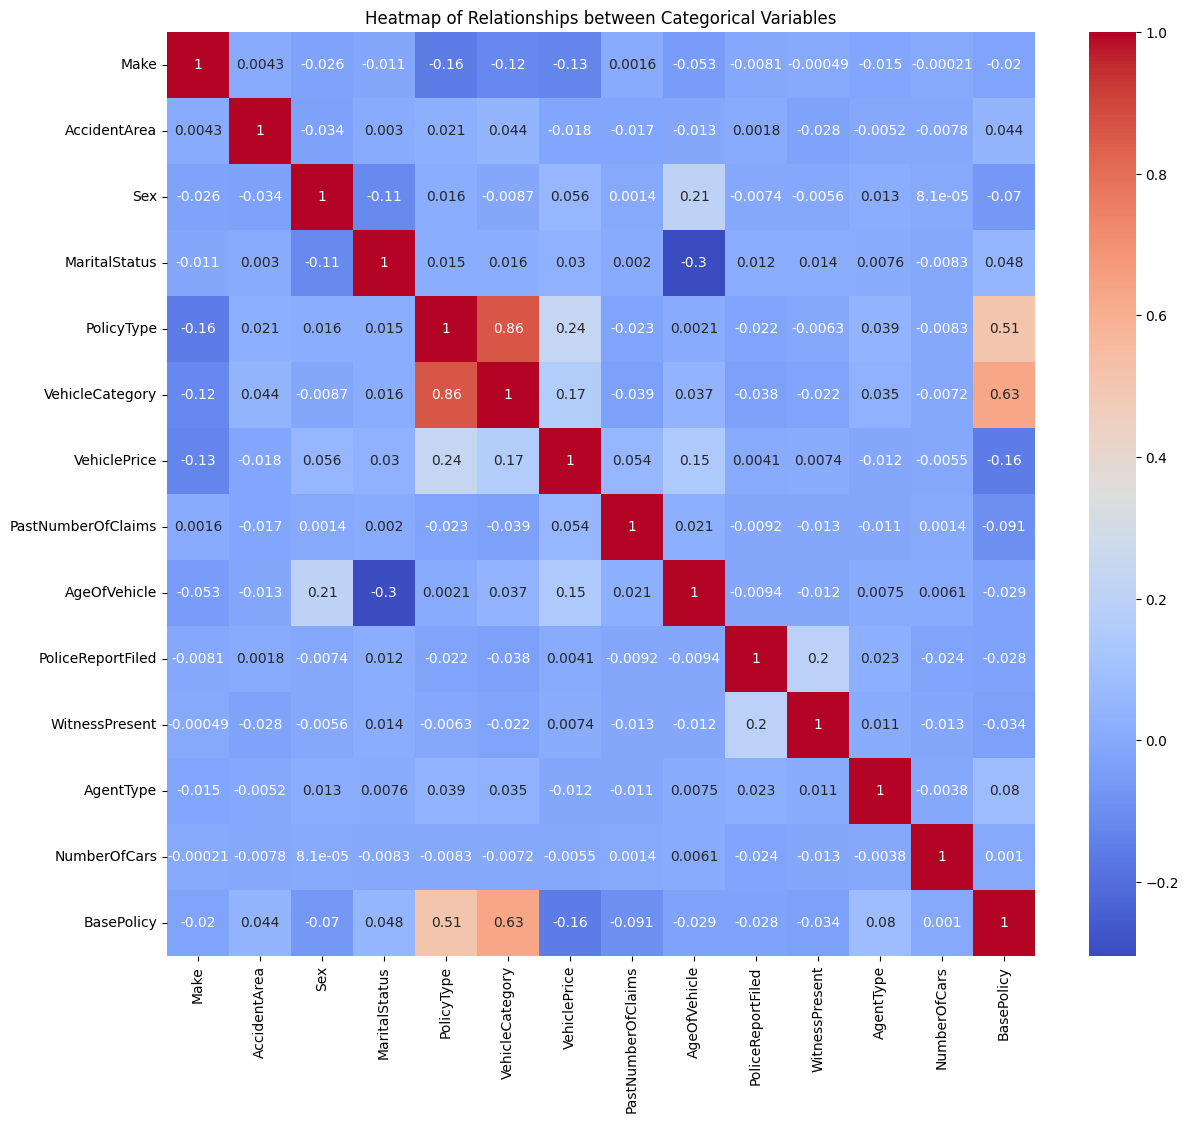

In [39]:
corr_matrix = categorical_df.apply(lambda x: x.astype('category').cat.codes).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Relationships between Categorical Variables')
plt.show()

In [40]:
categorical_df.columns

Index(['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [41]:
#removed 'VehicleCategory'(since VehicleCategory and PolicyType have correlation of 0.86)
df = df.drop(['VehicleCategory'], axis=1)
#removed 'BasePolicy'(since correlation with Policy Type)
df = df.drop(['BasePolicy'], axis=1)

In [42]:
print('Out of all the reocords, % of records not commited fraud==> ',len(df[df['FraudFound_P']==0])/len(df)*100)
print('Out of all the records, % of records commited fraud==> ',len(df[df['FraudFound_P']==1])/len(df)*100)

# we have highly unbalanced  data

Out of all the reocords, % of records not commited fraud==>  94.01426718547341
Out of all the records, % of records commited fraud==>  5.985732814526589


In [43]:
#To solve The problem of unbalanced data, performed oversampling

from sklearn.utils import resample

oversamp=resample(df[df['FraudFound_P']==1],
                 replace=True,
                 n_samples=len(df[df['FraudFound_P']==0]),
                 random_state=30)
df=pd.concat([oversamp, df[df['FraudFound_P']==0]])

In [44]:
print('Out of all reocrds, % of records not commited fraud==> ',len(df[df['FraudFound_P']==0])/len(df)*100)
print('Out of all records, % of records commited fraud==> ',len(df[df['FraudFound_P']==1])/len(df)*100)

Out of all reocrds, % of records not commited fraud==>  50.0
Out of all records, % of records commited fraud==>  50.0


In [45]:
x=df.drop('FraudFound_P', axis=1 )
y=df['FraudFound_P']

In [46]:
x.shape

(28994, 15)

In [47]:
x.columns

Index(['Make', 'AccidentArea', 'Sex', 'Age', 'MaritalStatus', 'PolicyType',
       'VehiclePrice', 'Deductible', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfVehicle', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfCars'],
      dtype='object')

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28994 entries, 13241 to 15418
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Make                28994 non-null  object
 1   AccidentArea        28994 non-null  object
 2   Sex                 28994 non-null  object
 3   Age                 28994 non-null  int64 
 4   MaritalStatus       28994 non-null  object
 5   PolicyType          28994 non-null  object
 6   VehiclePrice        28994 non-null  object
 7   Deductible          28994 non-null  int64 
 8   DriverRating        28994 non-null  int64 
 9   PastNumberOfClaims  28994 non-null  object
 10  AgeOfVehicle        28994 non-null  object
 11  PoliceReportFiled   28994 non-null  object
 12  WitnessPresent      28994 non-null  object
 13  AgentType           28994 non-null  object
 14  NumberOfCars        28994 non-null  object
dtypes: int64(3), object(12)
memory usage: 3.5+ MB


In [49]:
x.nunique()

Make                  19
AccidentArea           2
Sex                    2
Age                   66
MaritalStatus          4
PolicyType             9
VehiclePrice           6
Deductible             4
DriverRating           4
PastNumberOfClaims     4
AgeOfVehicle           8
PoliceReportFiled      2
WitnessPresent         2
AgentType              2
NumberOfCars           5
dtype: int64

In [50]:
unique_values_set = set(df['Make'])

# Print the unique values
print(unique_values_set)

{'Mazda', 'BMW', 'Porche', 'Saab', 'Jaguar', 'Mecedes', 'Chevrolet', 'Mercury', 'Pontiac', 'VW', 'Saturn', 'Nisson', 'Toyota', 'Honda', 'Lexus', 'Ferrari', 'Ford', 'Accura', 'Dodge'}


In [51]:
unique_values_set = set(df['Age'])
# Print the unique values
print(unique_values_set)

{0, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80}


In [52]:
unique_values_set = set(df['MaritalStatus'])
# Print the unique values
print(unique_values_set)

{'Divorced', 'Single', 'Married', 'Widow'}


In [53]:
unique_values_set = set(df['PolicyType'])
print(unique_values_set)

{'Sport - Liability', 'Sport - All Perils', 'Utility - Collision', 'Sedan - Liability', 'Utility - All Perils', 'Sedan - Collision', 'Sport - Collision', 'Utility - Liability', 'Sedan - All Perils'}


In [54]:
unique_values_set = set(df['VehiclePrice'])
print(unique_values_set)

{'30000 to 39000', 'less than 20000', '20000 to 29000', 'more than 69000', '40000 to 59000', '60000 to 69000'}


In [55]:
unique_values_set = set(df['Deductible'])
print(unique_values_set)

{400, 700, 500, 300}


In [56]:
unique_values_set = set(df['DriverRating'])
print(unique_values_set)

{1, 2, 3, 4}


In [57]:

unique_values_set = set(df['PastNumberOfClaims'])
print(unique_values_set)

{'2 to 4', 'more than 4', 'none', '1'}


In [58]:
unique_values_set = set(df['AgeOfVehicle'])
print(unique_values_set)

{'6 years', '2 years', '4 years', 'more than 7', '3 years', '7 years', 'new', '5 years'}


In [59]:
unique_values_set = set(df['PoliceReportFiled'])
print(unique_values_set)

{'No', 'Yes'}


In [60]:
unique_values_set = set(df['WitnessPresent'])
print(unique_values_set)

{'No', 'Yes'}


In [61]:
unique_values_set = set(df['AgentType'])
print(unique_values_set)

{'External', 'Internal'}


In [62]:
unique_values_set = set(df['NumberOfCars'])
print(unique_values_set)

{'2 vehicles', '3 to 4', 'more than 8', '5 to 8', '1 vehicle'}


In [63]:
x.tail()

,Make,AccidentArea,Sex,Age,MaritalStatus,PolicyType,VehiclePrice,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfCars
15411,Honda,Rural,Male,42,Married,Sedan - All Perils,less than 20000,400,1,1,7 years,No,No,External,1 vehicle
15413,Mazda,Urban,Male,40,Married,Sedan - Liability,20000 to 29000,400,2,1,7 years,Yes,No,External,1 vehicle
15414,Chevrolet,Urban,Male,58,Single,Sedan - Collision,30000 to 39000,400,4,none,7 years,No,No,External,2 vehicles
15416,Pontiac,Urban,Male,30,Married,Sedan - Liability,30000 to 39000,400,3,more than 4,6 years,No,No,External,3 to 4
15418,Toyota,Urban,Female,34,Married,Sedan - All Perils,20000 to 29000,400,4,none,2 years,No,No,External,1 vehicle


In [64]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

# Assuming 'x' is your DataFrame containing the categorical columns
categorical_cols = x[['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'PolicyType',
                      'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle',
                      'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfCars']]

# Create a pipeline for one-hot encoding categorical columns
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first'))
])

# Use ColumnTransformer to apply the pipeline to the categorical columns
preprocessor = ColumnTransformer([
    ('cat', categorical_pipeline, categorical_cols.columns)  # Pass column names here
])

# Fit and transform the preprocessor on the data
X_train_processed = preprocessor.fit_transform(categorical_cols)


# Fetch column names from the fitted OneHotEncoder
ohe_column_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols.columns)

# Convert the sparse matrix to a DataFrame with column names
X_train_processed = pd.DataFrame.sparse.from_spmatrix(X_train_processed, columns=ohe_column_names)

joblib.dump(preprocessor, '/content/drive/MyDrive/Colab Notebooks/preprocessor.joblib')

X_train_processed.tail()


,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,Make_Lexus,Make_Mazda,Make_Mecedes,...,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
28989,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
numerical_col = x.select_dtypes(include=['int64'])
x = pd.concat([numerical_col.reset_index(drop=True), X_train_processed.reset_index(drop=True)], axis=1)

x.head()


,Age,Deductible,DriverRating,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,...,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
0,30,400,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37,400,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,30,400,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,400,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55,400,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
numerical_col.columns

Index(['Age', 'Deductible', 'DriverRating'], dtype='object')

In [67]:
numerical_col.head()

,Age,Deductible,DriverRating
13241,30,400,3
6300,37,400,1
13425,30,400,1
7618,28,400,1
2167,55,400,2


In [68]:
x.head()

,Age,Deductible,DriverRating,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,...,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
0,30,400,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37,400,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,30,400,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,400,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55,400,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
x.shape

(28994, 56)

In [70]:
#split and apply model


In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=13)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [73]:
x_train[[ 'Age','Deductible',  'DriverRating']]=scaler.fit_transform(x_train[['Age','Deductible', 'DriverRating']])
x_test[[ 'Age', 'Deductible',  'DriverRating']]=scaler.transform(x_test[['Age', 'Deductible',  'DriverRating']])

In [74]:
x_train.head()

,Age,Deductible,DriverRating,Make_BMW,Make_Chevrolet,Make_Dodge,Make_Ferrari,Make_Ford,Make_Honda,Make_Jaguar,...,AgeOfVehicle_7 years,AgeOfVehicle_more than 7,AgeOfVehicle_new,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8
6069,0.498818,-0.199668,-1.338942,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11479,-0.533922,-0.199668,0.445212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17615,1.310257,-0.199668,1.337288,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28415,-0.976525,-0.199668,-1.338942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15874,-0.238854,-0.199668,-0.446865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred2= knn.predict(x_test)
print("knn_model_train_acc: ", accuracy_score(y_train, knn.predict(x_train)))
print("knn_model_test_acc: ", accuracy_score( y_test, y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


knn_model_train_acc:  0.9298986850614357
knn_model_test_acc:  0.9080876013105708


In [76]:

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred3= dtc.predict(x_test)
print("dtc_model_train_acc: ", accuracy_score(y_train, dtc.predict(x_train)))
print("dtc_model_test_acc: ", accuracy_score( y_test, y_pred3))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


dtc_model_train_acc:  0.9958180642379824
dtc_model_test_acc:  0.9612002069322297


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [77]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200]}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_estimators = grid_search.best_params_['n_estimators']
print(best_estimators)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

200


In [78]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

rfc=RandomForestClassifier(n_estimators=150)

rfc.fit(x_train, y_train)
y_pred4= rfc.predict(x_test)
print("rfc_model_train_acc: ", accuracy_score(y_train, rfc.predict(x_train)))
print("rfc_model_test_acc: ", accuracy_score( y_test, y_pred4))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


rfc_model_train_acc:  0.9958180642379824
rfc_model_test_acc:  0.9839627521986549


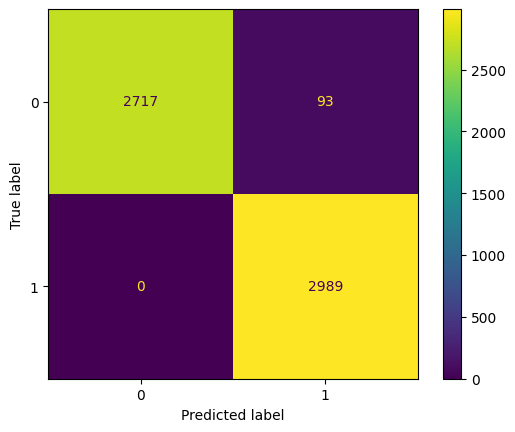

In [79]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred4)


In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      2810
           1       0.97      1.00      0.98      2989

    accuracy                           0.98      5799
   macro avg       0.98      0.98      0.98      5799
weighted avg       0.98      0.98      0.98      5799



In [81]:
input_data = pd.DataFrame({
    'Make': ["Chevrolet"],
    'AccidentArea': ["Urban"],
    'Sex': ["Male"],
    'Age': [18],
    'MaritalStatus': ["Married"],
    'PolicyType': ["Sedan - Liability"],
    'VehiclePrice': ["more than 69000"],
    'Deductible': [400],
    'DriverRating': [2],
    'PastNumberOfClaims': ["1"],
    'AgeOfVehicle': ["new"],
    'PoliceReportFiled': ["Yes"],
    'WitnessPresent': ["No"],
    'AgentType': ["Internal"],
    'NumberOfCars': ["1 vehicle"]
})
    # Assuming test_data is your DataFrame with categorical columns
categorical_cols = input_data[['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'PolicyType',
                                'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle',
                                'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfCars']]

# Assuming you have new_data which has similar categorical columns
X_processed = preprocessor.transform(categorical_cols)
ohe_column_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols.columns)

# Convert the sparse matrix to a DataFrame with column names
X_processed = pd.DataFrame.sparse.from_spmatrix(X_processed, columns=ohe_column_names)


# Now, new_data_encoded has the same one-hot encoding as the loaded_categorical_cols

numerical_cols = input_data[['Age', 'Deductible', 'DriverRating']]

    # Select numerical columns
data = pd.concat([numerical_cols.reset_index(drop=True), X_processed.reset_index(drop=True)], axis=1)

data[[ 'Age', 'Deductible',  'DriverRating']]=scaler.transform(data[['Age', 'Deductible',  'DriverRating']])


    # Combine numerical and categorical columns

predicted_label = rfc.predict(data)

if predicted_label[0] == 1:
    output_label = "Fraud Detected"
else:
    output_label = "No Fraud Detected"
print(output_label)

No Fraud Detected


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [82]:
'''from sklearn.ensemble import VotingClassifier
classifiers=[('knn', knn),('dtc', dtc), ('rfc', rfc)]
vc=VotingClassifier(estimators = classifiers)
vc.fit(x_train, y_train)
y_pred5= vc.predict(x_test)
print("vc_model_train_acc: ", accuracy_score(y_train, vc.predict(x_train)))
print("vc_model_test_acc: ", accuracy_score( y_test, y_pred5))
'''

'from sklearn.ensemble import VotingClassifier\nclassifiers=[(\'knn\', knn),(\'dtc\', dtc), (\'rfc\', rfc)]\nvc=VotingClassifier(estimators = classifiers)\nvc.fit(x_train, y_train)\ny_pred5= vc.predict(x_test)\nprint("vc_model_train_acc: ", accuracy_score(y_train, vc.predict(x_train)))\nprint("vc_model_test_acc: ", accuracy_score( y_test, y_pred5))\n'

In [83]:
k_folds = KFold(n_splits = 10)
scores = cross_val_score(rfc, x, y, cv = k_folds)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:768: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

In [84]:
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [1.         1.         1.         1.         1.         0.95377716
 0.96412556 0.96654019 0.96723008 0.96964471]
Average CV Score:  0.9821317695757157


In [85]:
import joblib
drive.mount('/content/drive')
joblib.dump(rfc, '/content/drive/MyDrive/Colab Notebooks/trained_model.pkl')
# Save the one-hot encoded DataFrame
joblib.dump(categorical_cols, '/content/drive/MyDrive/Colab Notebooks/one_hot_encoded_data.joblib')
# Assuming 'scaler' is your scaler object
joblib.dump(scaler, '/content/drive/MyDrive/Colab Notebooks/scaler_filename.pkl')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/Colab Notebooks/scaler_filename.pkl']